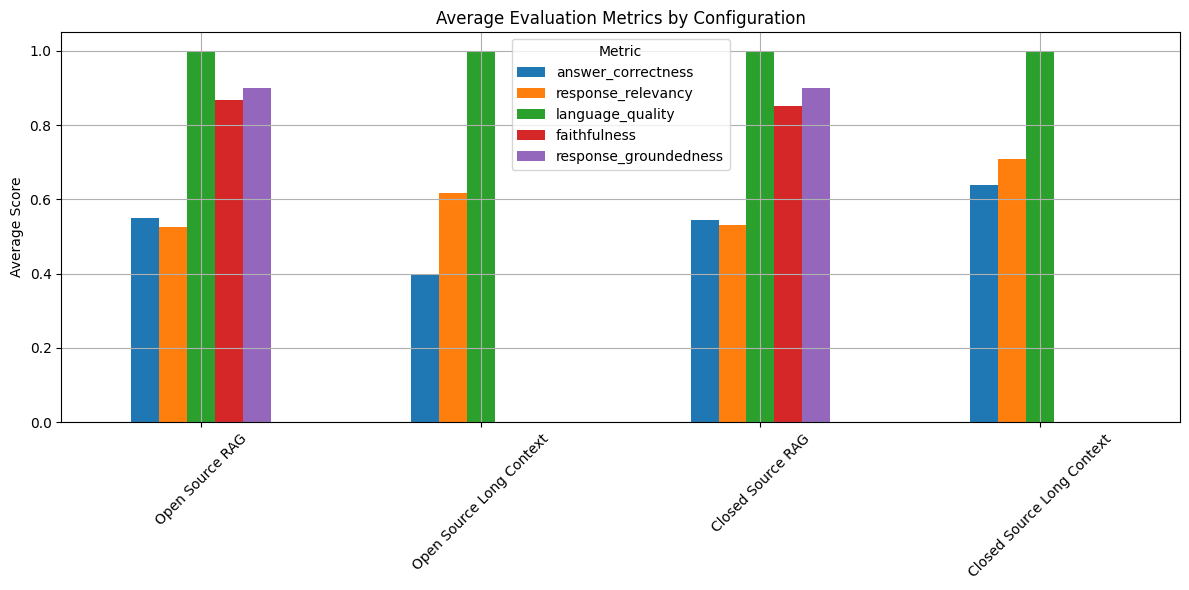

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle("results/generation/2025-07-24_15-23-38.pkl")

# Define configurations and metrics
configs = [
    "Open Source RAG",
    "Open Source Long Context",
    "Closed Source RAG",
    "Closed Source Long Context"
]

metrics = [
    "answer_correctness",
    "response_relevancy",
    "language_quality",
    "faithfulness",
    "response_groundedness"
]

# Compute average scores
averages = {}
for config in configs:
    averages[config] = {}
    for metric in metrics:
        col = f"{config}_{metric}"
        if col in df.columns:
            values = df[col].apply(lambda x: x[0] if isinstance(x, list) and x else x)
            values = pd.to_numeric(values, errors='coerce')
            averages[config][metric] = values.mean()

# Create DataFrame and sort
avg_df = pd.DataFrame(averages)
avg_df_ordered = avg_df[configs].T

# Plot
avg_df_ordered.plot(kind="bar", figsize=(12, 6))
plt.title("Average Evaluation Metrics by Configuration")
plt.ylabel("Average Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Metric")
plt.show()